# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

Пользователькие данные содержат такую информацию как: общая и жилая площадь, площадь кухни, этаж, стоимость, населенный пункт и т.д.

План работ:
1. Выполним предобработку данных: найдем и заполним по возможности пропуски, удалим дубликаты, исправим типы данных и т.д.
2. Выполним исследовательский анализ: изучим основные параметры объектов и построим для них гистограммы, выявим зависимости одних параметров от других и т.д. 

### Изучим данные. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
pd.set_option('display.max_columns', 50)
pd.options.mode.chained_assignment = None

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

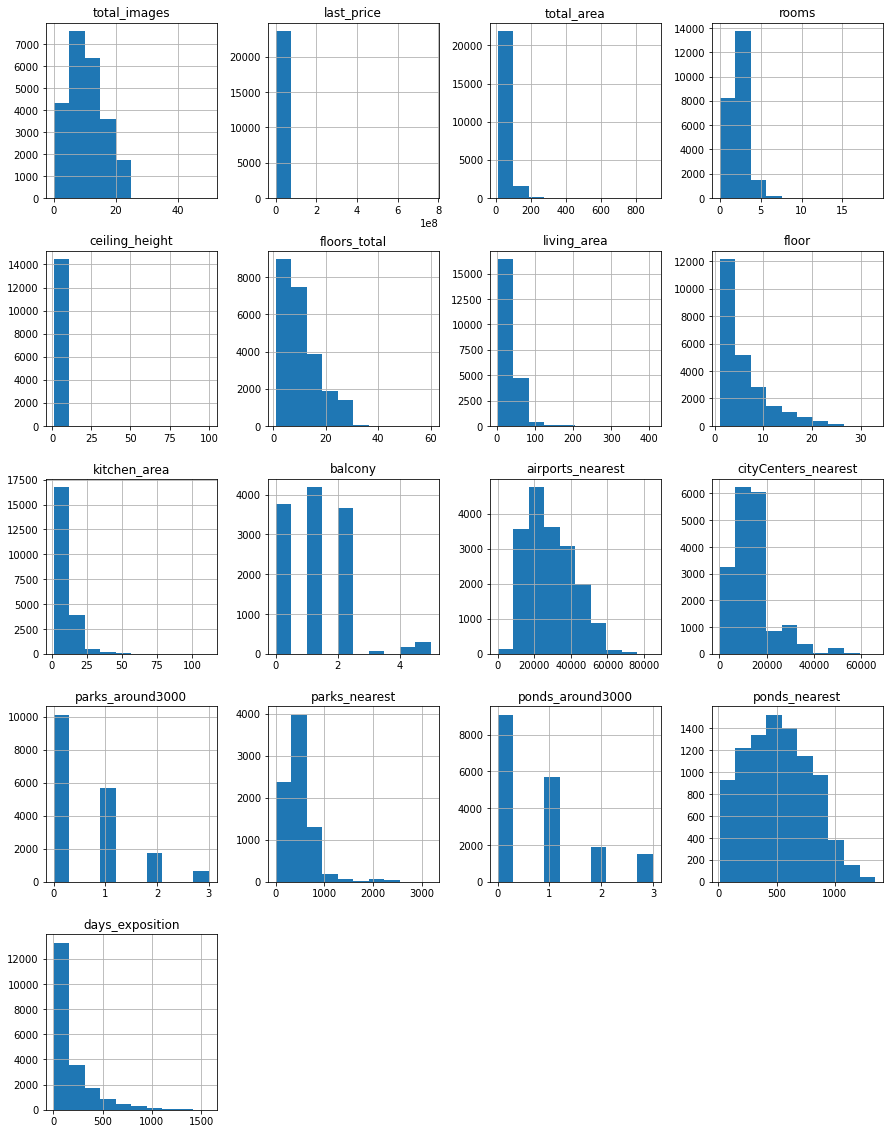

In [2]:
pth1 = 'datasets/real_estate_data.csv'
if os.path.exists(pth1):
    data = pd.read_csv(pth1, sep='\t')
else:
    print('Something is wrong')
display(data.head())
data.info()
data.hist(figsize=(15, 20))
None

**Общий вывод: Таблица состоит из 23699 строк и 21 столбец, имеются пропущенные значения, есть ошибки в типах данных, данных из геосервисов гораздо меньше чем пользовательских. Есть необходимость в проверке данных, где и чем мы можем восполнить недостающие данные или придется удалять всю строку.**

### Предобработка данных

In [3]:
print(data.isnull().sum())
print()
print(data.isnull().sum ()/ len(data) * 100)

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment        

In [4]:
data.duplicated().sum() #подсчёт дупликатов
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].mean()) #заполняем высоту потолков средним значением
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].mean()) #заполняем этажность средним значением
data['is_apartment'] = data['is_apartment'].fillna(False) #заполняем пропуски False
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].mean()) #заполняем площадь кухни средним значением
data['balcony'] = data['balcony'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].mean()) #заполняем число дней на размещении средним значением
data['living_area'] = data['living_area'].fillna(data['total_area'] - data['kitchen_area'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Пропущенные значения есть в следующих столбцах:
1. ceiling_height - высота потолков (м) - можно взять среднее значение от имеющихся данных
2. floors_total - всего этажей в доме - слишком большой разбег в этажности и хотя пропусков мало (заполним)
3. living_area - жилая площадь в квадратных метрах (м²) - сгруппировать по rooms и взять среднее??
4. is_apartment - апартаменты (булев тип) - пропуски == False
5. kitchen_area - площадь кухни в квадратных метрах (м²) - можно взять среднее значение от имеющихся данных
6. balcony - число балконов - пропуски == 0 
7. locality_name - название населённого пункта - ничего 
8. airports_nearest - расстояние до ближайшего аэропорта в метрах (м) - ничего
9. cityCenters_nearest - расстояние до центра города (м) - ничего
10. parks_around3000 - число парков в радиусе 3 км - пропуски == 0
11. parks_nearest - расстояние до ближайшего парка (м) - ничего
12. ponds_around3000 - число водоёмов в радиусе 3 км - пропуски == 0
13. ponds_nearest - расстояние до ближайшего водоёма (м) - ничего
14. days_exposition - сколько дней было размещено объявление (от публикации до снятия) - можно взять среднее значение от имеющихся данных

In [5]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['is_apartment'] = data['is_apartment'].astype(bool)
data['floors_total'] = data['floors_total'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int32         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

Изменяем тип данных из строковых в дате публикации объявлений. Также меняем is_apartment в булев тип.

In [6]:
data['locality_name'] = (
    data['locality_name']
    .replace(['посёлок ', 'поселок ', 'поселок городского типа ', 'городской посёлок ', 'деревня ', 'садовое товарищество ', 'поселок городского типа ', 'село '], '', regex=True)
)

data['locality_name'] = (
    data['locality_name']
    .replace(['городской ', 'городского типа ', 'станции ', 'коттеджный ', 'при железнодорожной '], '', regex=True)
)
print(data['locality_name'].unique())

['Санкт-Петербург' 'Шушары' 'Янино-1' 'Парголово' 'Мурино' 'Ломоносов'
 'Сертолово' 'Петергоф' 'Пушкин' 'Кудрово' 'Коммунар' 'Колпино'
 'Красный Бор' 'Гатчина' 'Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'Новое Девяткино' 'Металлострой' 'Лебяжье' 'Сиверский' 'Молодцово'
 'Кузьмоловский' 'Новая Ропша' 'Павловск' 'Пикколово' 'Всеволожск'
 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк' 'Куттузи' 'Аннино'
 'Ефимовский' 'Плодовое' 'Заклинье' 'Торковичи' 'Первомайское'
 'Красное Село' 'Понтонный' 'Сясьстрой' 'Старая' 'Лесколово' 'Новый Свет'
 'Сланцы' 'Путилово' 'Ивангород' 'Шлиссельбург' 'Никольское' 'Зеленогорск'
 'Сосновый Бор' 'Оржицы' 'Кальтино' 'Романовка' 'Бугры' 'Рощино' 'Кириши'
 'Луга' 'Волосово' 'Отрадное' 'Павлово' 'Оредеж' 'Копорье' 'Молодёжное'
 'Тихвин' 'Победа' 'Нурма' 'Синявино' 'Тосно' 'Стрельна' 'Бокситогорск'
 'Александровская' 'Лопухинка' 'Пикалёво' 'Терволово' 'Советский'
 'Подпорожье' 'Петровское' 'Токсово' 'Сельцо' 'Вырица' 'Кипень' 'Келози'
 'Вартемяги' 'Тельмана' '

Удаляем неявные дубликаты в названиях населенных пунктов. Решил вообще убрать тип населенного пункта.

### Посчитаем и добавим в таблицу новые столбцы

Добавляем новые столбцы со следующей информацией:
1. цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой);
2. день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
3. месяц публикации объявления;
4. год публикации объявления;
5. тип этажа квартиры (значения — «первый», «последний», «другой»);
6. расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений).

In [7]:
data['price_one_m'] = round(data['last_price'] / data['total_area'], 2) #цена одного квадратного метра
data['day_of_week'] = data['first_day_exposition'].dt.weekday #день недели публикации объявления
data['month'] = data['first_day_exposition'].dt.month #месяц
data['year'] = data['first_day_exposition'].dt.year #год
# присваиваем тип этажа
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'   
data['floor_type'] = data.apply(floor_type, axis=1)
data['cityCenters_nearest_in_m'] = round(data['cityCenters_nearest'] /1000, 0) #расстояние до центра города в км

### Проведите исследовательский анализ данных

#### Изучим параметры объектов

Изучаем следующие параметры:
1. Общая площадь
2. Жилая площадь
3. Площадь кухни
4. Цена объекта
5. Количество комнат
6. Высота потолков
7. Тип этажа квартиры
8. Общее количество этажей в доме
9. Расстояние до центра города в метрах
10. Расстояние до ближайшего парка

**Анализ общей площади квартир.**

In [8]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Максимальная площадь 900м? Живут же люди...
При изучении гистограммы были выявлено, что основная масса квартир до 200 м. Рассмотрим только до 200м.

<AxesSubplot:>

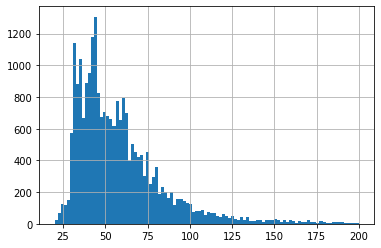

In [9]:
data = data.query('total_area < 200') #не будем учитывать квартиры более 200м, их менее 1%
data = data.query('total_area > 20') #не будем учитывать квартиры менее 20м, их менее 1%
data['total_area'].hist(bins=100, range=(20, 200))

**Анализ жилой площади**

In [10]:
data['living_area'].describe()

count    23433.000000
mean        34.475230
std         18.817135
min          2.000000
25%         19.000000
50%         30.500000
75%         43.000000
max        188.630193
Name: living_area, dtype: float64

Видим аномалии в виде минимальной жилой площади в 2м. В анализе общей площади мы исключили из расчета квартиры менее 20 м и более 200. Посмотрим на график.

<AxesSubplot:>

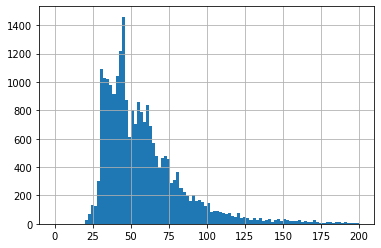

In [11]:
data['total_area'].hist(bins=100, range=(0, 200))

**Анализ площади кухни**

In [12]:
data['kitchen_area'].describe()

count    23433.000000
mean        10.404351
std          5.107461
min          1.300000
25%          7.300000
50%         10.000000
75%         11.300000
max         93.200000
Name: kitchen_area, dtype: float64

1.3 метра для кухни маловато. Посмотрим на график

<AxesSubplot:>

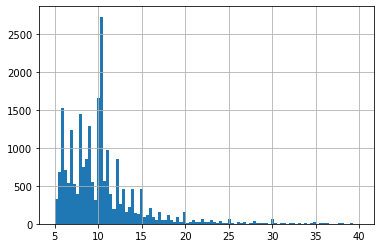

In [13]:
data = data.query('kitchen_area < 40') #
data = data.query('kitchen_area > 5') #
data['kitchen_area'].hist(bins=100, range=(5, 40))

In [14]:
low_percentele = 0.01
hihg_percentele = 0.99

last_price_low = data['last_price'].quantile(low_percentele)
last_price_high = data['last_price'].quantile(hihg_percentele)

print(f'Нижняя граница last_price {last_price_low}')
print(f'Верхняя граница last_price {last_price_high}')

print(
    'Процент отброшенных значений = ',
    round(
        100 - len(data.query('@last_price_low <= last_price <= @last_price_high'))
        / len(data['last_price']) * 100,
        2
    ),
    '%'
)

Нижняя граница last_price 1016200.0
Верхняя граница last_price 26521660.00000006
Процент отброшенных значений =  2.0 %


Кухнями более 40м и менее 5м можно пренебречь.

**Анализ цен на объекты**

In [15]:
data['last_price_mln'] = data['last_price'] / 1000000 #для наглядности переведем стоимость в млн рублей
data['last_price_mln'].describe()

count    22863.000000
mean         5.972116
std          5.582125
min          0.430000
25%          3.450000
50%          4.650000
75%          6.700000
max        289.238400
Name: last_price_mln, dtype: float64

<AxesSubplot:>

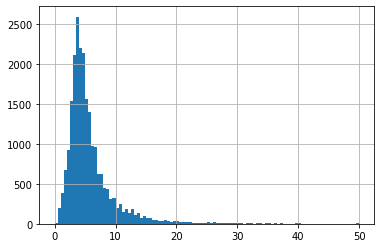

In [16]:
data['last_price_mln'].hist(bins=100, range=(0, 50))

Видим, что данными с ценами выше 40 млн можно смело пренебречь.

In [17]:
data = data.query('last_price_mln < 40') #избавляемся от астрономических сумм
data['last_price_mln'].describe()

count    22787.000000
mean         5.788030
std          4.212536
min          0.430000
25%          3.450000
50%          4.630000
75%          6.680000
max         39.990000
Name: last_price_mln, dtype: float64

**Анализ количества комнат**

In [18]:
data['rooms'].describe()

count    22787.000000
mean         2.029359
std          0.992497
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

Минимум 0 комнат? Что-то здесь не чисто...

In [19]:
print(data[data['rooms'] < 1].count().head())

total_images            186
last_price              186
total_area              186
first_day_exposition    186
rooms                   186
dtype: int64


186 квартир не имют ни одной комнаты, чтож кто-то действительно живет только на кухне... Удаляем таких.

In [20]:
data = data.query('rooms >= 1')
data['rooms'].describe()

count    22601.000000
mean         2.046060
std          0.979278
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

<AxesSubplot:>

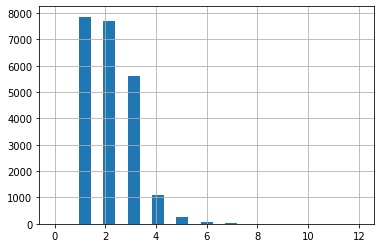

In [21]:
data['rooms'].hist(bins=25, range=(0, 12))

Однушек и двушек больше всего, это нормальная ситуация...

**Анализ высоты потолков**

In [22]:
data['ceiling_height'].describe()

count    22601.000000
mean         2.766199
std          0.993444
min          1.000000
25%          2.600000
50%          2.771499
75%          2.771499
max        100.000000
Name: ceiling_height, dtype: float64

Явно есть аномальные значения в виде высоты потолка в 1м и 100м. Посмтрим на гистограмму.

<AxesSubplot:>

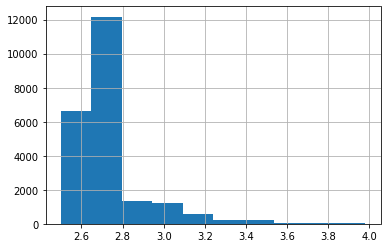

In [23]:
data = data.query('ceiling_height >= 2.5') #избавляемся от слишком низких квартир.
data = data.query('ceiling_height < 4') #не вижу смысла исправлять высоту (делить на 10), так как таких квартир очень мало(сильно меньше 5%)
data['ceiling_height'].hist()

В итоге оставляем высоту потолков в пределах от 2,5 до 4 метров, остальные считаем ошибками в данных.

**Анализ по типу этажа**

In [24]:
data['floor_type'].describe()

count      22442
unique         3
top       другой
freq       16629
Name: floor_type, dtype: object

<AxesSubplot:>

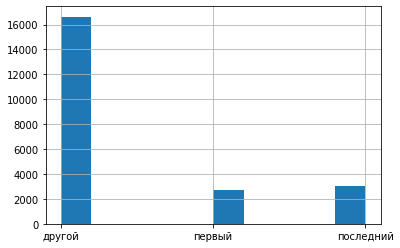

In [25]:
data['floor_type'].hist()

Тут все понятно, двух и трехэтажных домов все меньше и меньше...

**Анализ этажности домов**

In [26]:
data['floors_total'].describe()

count    22442.000000
mean        10.800731
std          6.579717
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Загуглив (можно такое писать в сервисе Яндекса?) самый высокий жилой дом в Питере, выидим, что максимум 35 этажей, остальное выбросим. По графику ниже понимаем, что смело можно так поступить.

<AxesSubplot:>

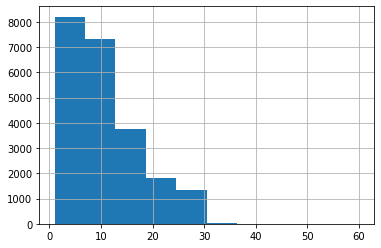

In [27]:
data['floors_total'].hist()

In [28]:
data = data.query('floors_total <= 35')

Посмотрим еще раз на обновленную гистграмму.

<AxesSubplot:>

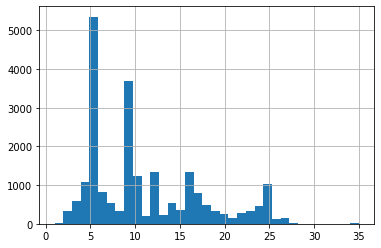

In [29]:
data['floors_total'].hist(bins=35)

Пятидевятиэтажный Питер. Как и вся Россия...

**Анализ близости к центру**

In [30]:
data['cityCenters_nearest'].describe()

count    17228.000000
mean     14285.512712
std       8458.612993
min        181.000000
25%       9567.000000
50%      13195.000000
75%      16316.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

<AxesSubplot:>

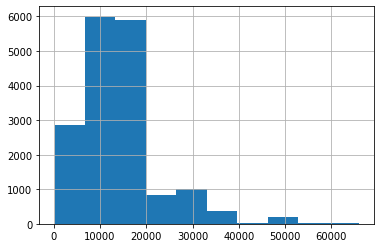

In [31]:
data['cityCenters_nearest'].hist()

Тут не видно ничего аномального.

**Анализ близости парков**

In [32]:
data['parks_nearest'].describe()

count    7559.000000
mean      493.911232
std       345.805455
min         1.000000
25%       288.000000
50%       456.000000
75%       615.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Кому-то повезло жить в парке...

<AxesSubplot:>

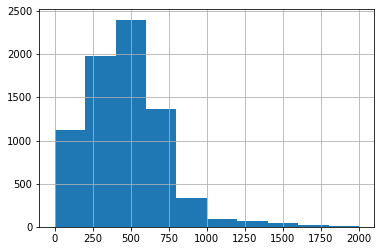

In [33]:
data['parks_nearest'].hist(range=(0, 2000))

Тут тоже особо сказать нечего. Разве что хочется посмотреть на усы..

<AxesSubplot:>

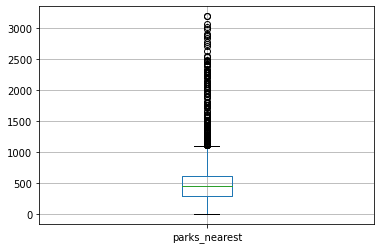

In [34]:
data.boxplot(column='parks_nearest')

Можно ли тут считать плохими данными все что выше 1100?

#### Изучаем скорость продажи квартиры

**Рассмотрим как быстро продавались квартиры**

<AxesSubplot:>

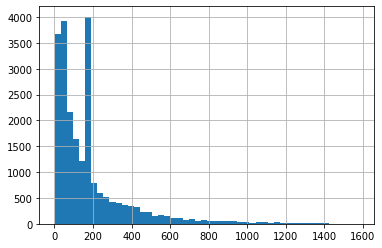

In [35]:
data['days_exposition'].hist(bins=50) #стрим гистограмму

In [36]:
print('Среднее арифметическое срока продажи квартир:', data['days_exposition'].mean())
print('Медиана срока продажи квартир:', data['days_exposition'].median())

Среднее арифметическое срока продажи квартир: 179.66873763273964
Медиана срока продажи квартир: 123.0


Продажа квартир занимает в среднем 4 месяца.

In [37]:
data['days_exposition'].describe()

count    22438.000000
mean       179.668738
std        202.978876
min          1.000000
25%         45.000000
50%        123.000000
75%        197.000000
max       1580.000000
Name: days_exposition, dtype: float64

Как за день можно продать квартиру? Что-то здесь не чисто...

In [38]:
pd.set_option('max_columns', None)
display(data.query('days_exposition < 3'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_m,day_of_week,month,year,floor_type,cityCenters_nearest_in_m,last_price_mln
1632,19,4000000.0,49.9,2019-05-01,2,2.500000,9,25.000000,1,False,False,False,10.000000,0.0,Санкт-Петербург,13567.0,14384.0,1.0,20.0,1.0,681.0,1.0,80160.32,2,5,2019,первый,14.0,4.000
13061,20,6100000.0,51.4,2019-04-29,2,3.000000,5,31.700000,4,False,False,False,6.900000,1.0,Санкт-Петербург,10776.0,9389.0,0.0,NaN,0.0,NaN,2.0,118677.04,0,4,2019,другой,9.0,6.100
16053,4,4070000.0,45.1,2019-04-30,2,2.771499,5,22.700000,3,False,False,False,6.600000,0.0,Санкт-Петербург,40859.0,11668.0,2.0,485.0,0.0,NaN,2.0,90243.90,1,4,2019,другой,12.0,4.070
16212,0,7806000.0,25.0,2019-04-30,1,3.000000,5,14.430193,5,False,False,False,10.569807,0.0,Санкт-Петербург,36525.0,10302.0,0.0,NaN,0.0,NaN,2.0,312240.00,1,4,2019,последний,10.0,7.806


Четыре квартиры продались очень быстро за 1-2 дня. Наблюдаем следющую картину:
1. Все 4 квартиры были куплены за 3 дня с 29 апреля по 1 мая 2019
2. Все 4 квартиры находятся в самом центре Питера.
3. Квартира которая продалась за один день находится на первом этаже девятиэтажного дома в самом центре Питера. Купили ее за 4 млн. Это супер-цена за такую недвижимость, которую можно перевести под коммерцию.
4. А вот три остальных квартиры очень похоже что находятся в одном доме. Неужели кто-то решил сделать себе трехуровневую квартиру или может организовать там мини-отель? Но в квартире на 5 этаже может жил сам Цой?

Посмотрим на самые затяжные продажи

In [39]:
display(data.query('days_exposition > 1500').sort_values(by='first_day_exposition'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_m,day_of_week,month,year,floor_type,cityCenters_nearest_in_m,last_price_mln
1109,1,34878556.0,95.80,2014-12-09,2,2.771499,6,58.30,5,True,False,False,20.00,1.0,Санкт-Петербург,21860.0,318.0,2.0,160.0,3.0,569.0,1572.0,364076.78,1,12,2014,другой,0.0,34.878556
1885,2,13300000.0,79.60,2014-12-09,2,3.000000,8,42.70,7,False,False,False,18.00,0.0,Санкт-Петербург,39393.0,11096.0,1.0,537.0,0.0,NaN,1513.0,167085.43,1,12,2014,другой,11.0,13.300000
9553,11,10600000.0,80.00,2014-12-09,3,2.850000,17,44.00,9,False,False,False,15.00,0.0,Санкт-Петербург,17101.0,17110.0,0.0,NaN,0.0,NaN,1553.0,132500.00,1,12,2014,другой,17.0,10.600000
6691,3,4400000.0,42.98,2014-12-12,1,2.771499,5,18.72,1,False,False,False,11.31,0.0,Пушкин,19715.0,30358.0,1.0,439.0,3.0,232.0,1512.0,102373.20,4,12,2014,первый,30.0,4.400000
18843,11,3500000.0,48.20,2014-12-15,2,2.500000,5,27.40,2,False,False,False,7.70,3.0,Новое Девяткино,NaN,NaN,0.0,NaN,0.0,NaN,1580.0,72614.11,0,12,2014,другой,NaN,3.500000


Тут конечно выбивается квартира за 34+млн. И в Новое Девяткино никто не хочет ехать.

#### Факторы, влияющие на стоимость объекта

Изучим, зависит ли цена от:
1. общей площади;
2. жилой площади;
3. площади кухни;
4. количества комнат;
5. этажа, на котором расположена квартира (первый, последний, другой);
6. даты размещения (день недели, месяц, год).

##### Зависимость цены от общей площади

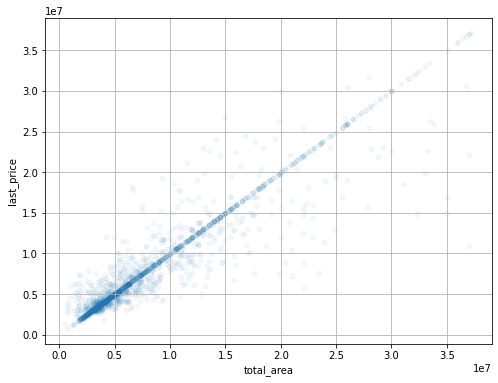

In [40]:
data_corr = data.pivot_table(index='total_area', values='last_price', aggfunc=['first', 'median'])
data_corr.columns = ['total_area' , 'last_price']
data_corr.plot(x='total_area', y='last_price', kind='scatter', alpha=0.05, figsize=(8, 6), grid=True) # Тут сомнения есть, что сделал правильно
None

Посчитаем корреляцию

In [41]:
print(data['total_area'].corr(data['last_price']))

0.7698890102653946


Наблюдается положительная корреляция

##### Зависимость цены от жилой площади

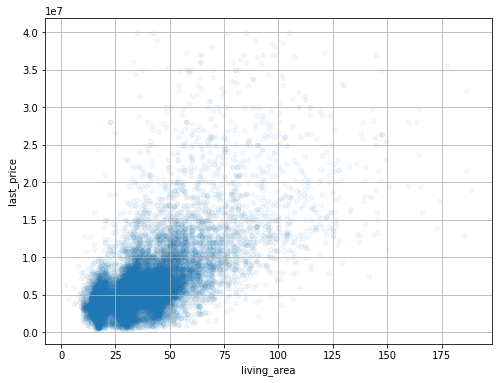

In [42]:
data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.05, figsize=(8, 6), grid=True)
None

In [43]:
print(data['living_area'].corr(data['last_price']))

0.659463412183142


Также наблюдается положительная корреляция

##### Зависимость цены от площади кухни

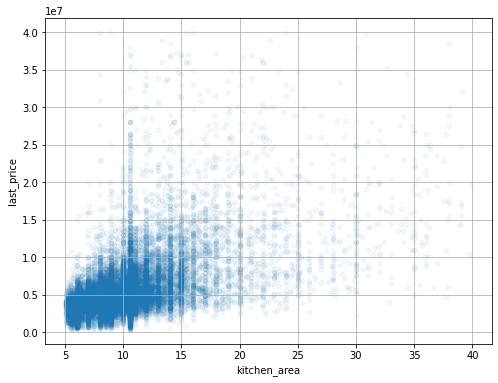

In [44]:
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.05, figsize=(8, 6), grid=True)
None

In [45]:
print(data['kitchen_area'].corr(data['last_price']))

0.5374979220960652


Здесь зависимость слабее, но она есть.

##### Зависимсоть цены от количества комнат

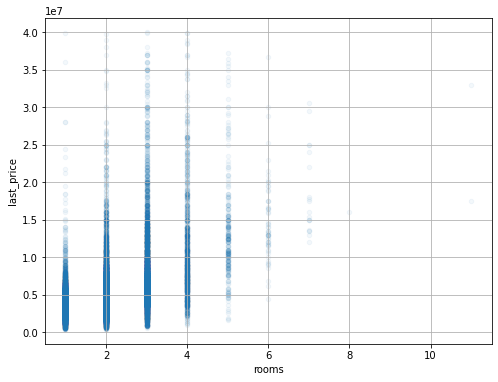

In [46]:
data.plot(x='rooms', y='last_price', kind='scatter', alpha=0.05, figsize=(8, 6), grid=True)
None

In [47]:
print(data['rooms'].corr(data['last_price']))

0.48588027715184395


##### Зависимость этажа на стоимость

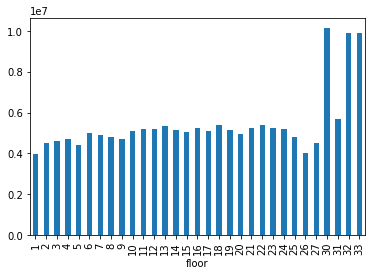

In [48]:
data.groupby('floor')['last_price'].median().plot.bar()
None

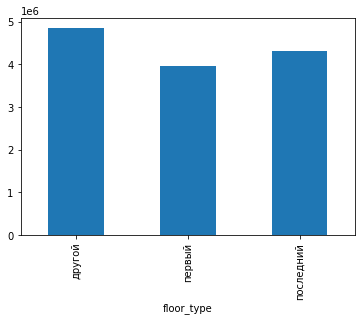

In [49]:
data.groupby('floor_type')['last_price'].median().plot.bar()
None

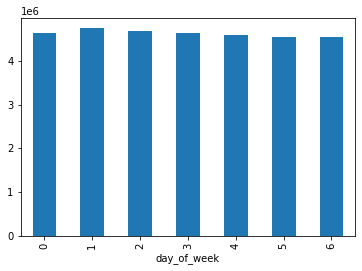

In [50]:
data.groupby('day_of_week')['last_price'].median().plot.bar()
None

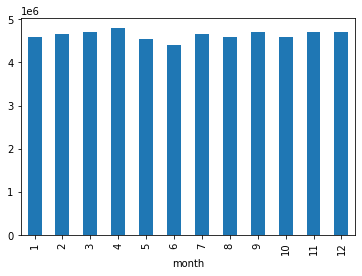

In [51]:
data.groupby('month')['last_price'].median().plot.bar()
None

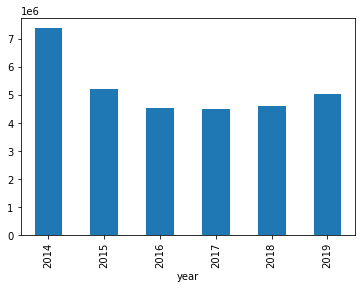

In [52]:
data.groupby('year')['last_price'].median().plot.bar()
None

#### Средняя цена по населенным пунктам

Выявим населенные пункты с самым дорогим и самым дешевым квадратным метром.

In [53]:
print(data.pivot_table(index='locality_name', values='price_one_m').sort_values(by='price_one_m', ascending=False).head(10))

                   price_one_m
locality_name                 
Зеленогорск      116185.257391
Санкт-Петербург  111195.478564
Репино           104238.612500
Пушкин           103619.376269
Сестрорецк       101656.010904
Лисий Нос        100660.816667
Мистолово         98549.977273
Левашово          96997.690000
Кудрово           94999.006421
Парголово         90382.525656


Как оказывается, самые дорогой квадратный метр в Зеленогорске. А как же вторая столица?

In [54]:
print(data.pivot_table(index='locality_name', values='price_one_m').sort_values(by='price_one_m').head(10))

                 price_one_m
locality_name               
Старополье         11206.220
Свирь              11481.480
Вахнова Кара       11688.310
Выскатка           12335.480
Совхозный          12629.130
Малая Романовка    12724.550
Тёсово-4           12931.030
Сижно              13709.680
Ям-Тесово          13711.555
Житково            14956.275


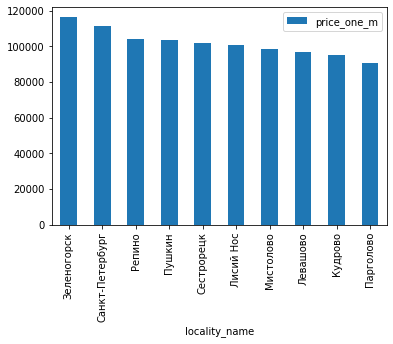

In [55]:
data.pivot_table(index='locality_name', values='price_one_m').sort_values(by='price_one_m', ascending=False).head(10).plot.bar()
None

А самый дешевый кваратный метр в Старополье.

#### Изучаем Питер

Вычислим как удаленность от центра влияет на стоимость.

In [56]:
data_piter = data.query('locality_name == "Санкт-Петербург"')
data_piter['price_center_km'] = round(data_piter['last_price'] / data_piter['cityCenters_nearest_in_m'], 2) #вычисли среднюю стоимость километра

Построим график зависимости близости к центру и ценой квадратного метра

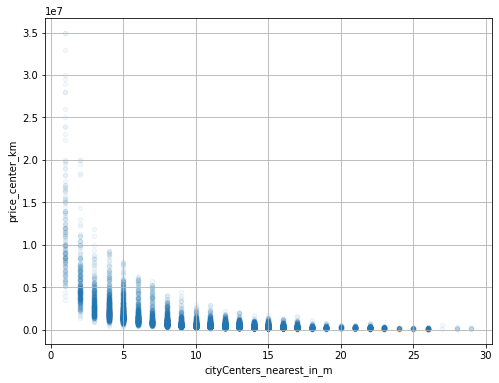

In [57]:
data_piter.plot(x='cityCenters_nearest_in_m', y='price_center_km', kind='scatter', alpha=0.05, figsize=(8, 6), grid=True)
None

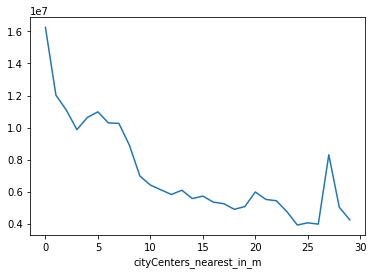

In [58]:
data_piter.groupby('cityCenters_nearest_in_m')['last_price'].mean().plot()
None

Связь очевидна, чем ближе к центру, тем дороже квартиры.

### Общий вывод

Мы провели анализ данных архива объявлений о продаже недвижимости в Ленинградской области.
Выявили некоторое количество отсутствующих данных и заполнили там, где уместно.
Удалили явные дубликаты.
Привели в порядок неявные дубликаты в названия населенных пунктов.
Посчитали среднюю ценю квадратного метра.
Категоризовали этажность объектов.

**Сделали анализ данных, выявили выбросы и построили гистграммы в следующих наборах:**
1. Общая площадь
2. Жилая площадь
3. Площадь кухни
4. Цена объекта
5. Количество комнат
6. Высота потолков
7. Тип этажа квартиры
8. Общее количество этажей в доме
9. Расстояние до центра города в метрах
10. Расстояние до ближайшего парка

**Изучили как быстро (медленно) продавались квартиры.**

**Изучили факторы влияющие на стоимость объекта такие как:**
1. общая площади - есть сильная прямая положительная зависимость
2. жилая площади - есть средняя прямая положительная зависимость
3. площади кухни - есть средняя прямая положительная зависимость
4. количество комнат - есть средняя прямая положительная зависимость
5. тип этажа (первый, последний, другой) - ???
6. дата размещения (день недели, месяц, год) - зависимости нет

**Выявили Топ-10 самых дорогих квадратных метров по населенным пунктам:**
1. Зеленогорск      116185.257391
2. Санкт-Петербург  111195.478564
3. Репино           104238.612500
4. Пушкин           103619.376269
5. Сестрорецк       101656.010904
6. Лисий Нос        100660.816667
7. Мистолово         98549.977273
8. Левашово          96997.690000
9. Кудрово           94999.006421
10. Парголово         90382.525656

**Выявили Топ-10 самых дешевых квадратных метров по населенным пунктам:**
1. Старополье         11206.220
2. Свирь              11481.480
3. Вахнова Кара       11688.310
4. Выскатка           12335.480
5. Совхозный          12629.130
6. Малая Романовка    12724.550
7. Тёсово-4           12931.030
8. Сижно              13709.680
9. Ям-Тесово          13711.555
10. Житково            14956.275

В заключение подтвердили теорию, что удаленность от центра влияет на стоимость квартир.